In [25]:
import pickle

# Path to data
base_path = './Data/Neuchatel_316L'

# Path to the segmented data
pickle_file_path = base_path + '/segmented_data_dict_all.pkl'  

# Load the dictionary from the pickle file
with open(pickle_file_path, 'rb') as file:
    segmented_data_dict = pickle.load(file)

print('Loaded segmented_data_dict from file.')


Loaded segmented_data_dict from file.


In [26]:
segmented_data_dict

{(90,
  1050): array([[[ 0.0881958 ,  0.1008606 ,  0.1342773 , ..., -0.00305176,
          -0.00686645, -0.0038147 ],
         [ 0.1014709 ,  0.1934814 ,  0.1947021 , ...,  0.1043701 ,
           0.1017761 ,  0.09963989]],
 
        [[ 0.06881714,  0.1130676 ,  0.1741028 , ...,  0.05859375,
           0.05615234,  0.06011963],
         [ 0.2833557 ,  0.2874756 ,  0.2754211 , ...,  0.2816772 ,
           0.2987671 ,  0.2832031 ]],
 
        [[ 0.0680542 ,  0.06958008,  0.07553101, ...,  0.1269531 ,
           0.10849   ,  0.08773804],
         [ 0.1502991 ,  0.1643372 ,  0.1989746 , ...,  0.8338928 ,
           0.665741  ,  0.7148743 ]],
 
        ...,
 
        [[ 0.07873535,  0.1454163 ,  0.2348328 , ...,  0.4969788 ,
           0.3479004 ,  0.3005981 ],
         [ 0.2307129 ,  0.3965759 ,  0.4388428 , ...,  0.5381775 ,
           0.5226135 ,  0.4724121 ]],
 
        [[ 0.4071045 ,  0.1878357 ,  0.2989197 , ...,  0.1843262 ,
           0.1548767 ,  0.1843262 ],
         [ 0.1025391 , 

In [27]:
def print_segmented_data_summary(segmented_data_dict):
    print("Summary of Segmented Data:")
    for key, tensor in segmented_data_dict.items():
        power, speed = key
        print(f"Power: {power}W, Speed: {speed}mm/s - Tensor Size: {tensor.shape}")

# Call the summary function
print_segmented_data_summary(segmented_data_dict)


Summary of Segmented Data:
Power: 90W, Speed: 1050mm/s - Tensor Size: (30, 2, 1890)
Power: 90W, Speed: 800mm/s - Tensor Size: (30, 2, 2495)
Power: 120W, Speed: 1800mm/s - Tensor Size: (30, 2, 1108)
Power: 120W, Speed: 1300mm/s - Tensor Size: (30, 2, 1507)
Power: 120W, Speed: 550mm/s - Tensor Size: (30, 2, 3635)
Power: 120W, Speed: 800mm/s - Tensor Size: (30, 2, 2497)
Power: 90W, Speed: 1300mm/s - Tensor Size: (30, 2, 1505)
Power: 105W, Speed: 1050mm/s - Tensor Size: (30, 2, 1902)
Power: 90W, Speed: 1550mm/s - Tensor Size: (31, 2, 965)
Power: 105W, Speed: 1800mm/s - Tensor Size: (30, 2, 1108)
Power: 105W, Speed: 800mm/s - Tensor Size: (31, 2, 2467)
Power: 120W, Speed: 300mm/s - Tensor Size: (30, 2, 6671)
Power: 105W, Speed: 1300mm/s - Tensor Size: (30, 2, 1535)
Power: 120W, Speed: 1050mm/s - Tensor Size: (30, 2, 1902)
Power: 105W, Speed: 300mm/s - Tensor Size: (30, 2, 6665)
Power: 90W, Speed: 550mm/s - Tensor Size: (30, 2, 3633)
Power: 105W, Speed: 1550mm/s - Tensor Size: (30, 2, 1287)


In [28]:
import numpy as np

# New dictionary to hold the reduced tensors
reduced_data_dict = {}


for key, tensor in segmented_data_dict.items():
    # Step 1: Reduce the tensor to (1, 2, M) using the median across the first axis
    median_tensor = np.median(tensor[:, :, int(tensor.shape[-1] * 0.1):int(tensor.shape[-1] * 0.9)], axis=0, keepdims=True)
    
    # Step 2: Calculate the median and std along the last axis for the reduced tensor
    median_of_median = np.median(median_tensor, axis=-1, keepdims=True)
    std_dev = np.std(median_tensor, axis=-1, keepdims=True)
    
    # Calculate the correlation coefficient between the two channels
    corr = np.corrcoef(median_tensor[0, 0, :], median_tensor[0, 1, :])[0, 1]

    # Instead of concatenating corr directly, create a structured representation
    combined_data = {
        'stats_tensor': np.concatenate((median_of_median, std_dev), axis=-1),  # Shape: (1, 2, 2)
        'corr': corr  # Scalar value
    }
    
    # Store this structured representation in the new dictionary
    reduced_data_dict[key] = combined_data

In [29]:
def print_reduced_data_summary(segmented_data_dict):
    print("Summary of Segmented Data:")
    for key, value in segmented_data_dict.items():
        power, speed = key
        print(f"Power: {power}W, Speed: {speed}mm/s - Tensor Size: {value['stats_tensor'].shape}")
        
print_reduced_data_summary(reduced_data_dict)


Summary of Segmented Data:
Power: 90W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1800mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 550mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 1550mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1800mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 300mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 300mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 550mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1550mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1550mm/s - Tensor Size: (1, 2, 2)
Power: 90W, S

In [30]:
import matplotlib.pyplot as plt

def plot_power_speed_data_with_corr(combined_data_dict):
    # Extract unique power values
    unique_powers = sorted(set(power for (power, _) in combined_data_dict.keys()))
    
    # For each unique power, find all speeds and process data
    for power in unique_powers:
        # Filter keys by power and sort speeds
        speeds = sorted(speed for (p, speed) in combined_data_dict.keys() if p == power)
        
        # Data for plotting
        medians_channel_0 = []
        medians_channel_1 = []
        stds_channel_0 = []
        stds_channel_1 = []
        corrs = []  # List to store correlation coefficients for each speed
        
        for speed in speeds:
            data_struct = combined_data_dict[(power, speed)]
            stats_tensor = data_struct['stats_tensor']  # Extract the stats tensor
            corr = data_struct['corr']  # Extract the correlation coefficient
            
            # Extract medians and standard deviations from the stats tensor
            medians_channel_0.append(stats_tensor[0, 0, 0])
            stds_channel_0.append(stats_tensor[0, 0, 1])
            medians_channel_1.append(stats_tensor[0, 1, 0])
            stds_channel_1.append(stats_tensor[0, 1, 1])
            corrs.append(corr)  # Store the correlation coefficient
        
        # Plotting the median and standard deviation for each channel
        fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
        fig.suptitle(f'Optical Data for Power = {power}W')
        
        axs[0].errorbar(speeds, medians_channel_0, yerr=stds_channel_0, fmt='-o', label='Channel 0: Emission')
        axs[1].errorbar(speeds, medians_channel_1, yerr=stds_channel_1, fmt='-o', color='r', label='Channel 1: Reflection')
        axs[2].plot(speeds, corrs, '-o', color='g', label='Correlation Coefficient')
        
        axs[0].set_xlabel('Speed (mm/s)')
        axs[0].set_ylabel('Median with STD')
        axs[0].legend()
        axs[1].set_xlabel('Speed (mm/s)')
        axs[1].legend()
        axs[2].set_xlabel('Speed (mm/s)')
        axs[2].set_ylabel('Correlation Coefficient')
        axs[2].legend()

        plt.show()

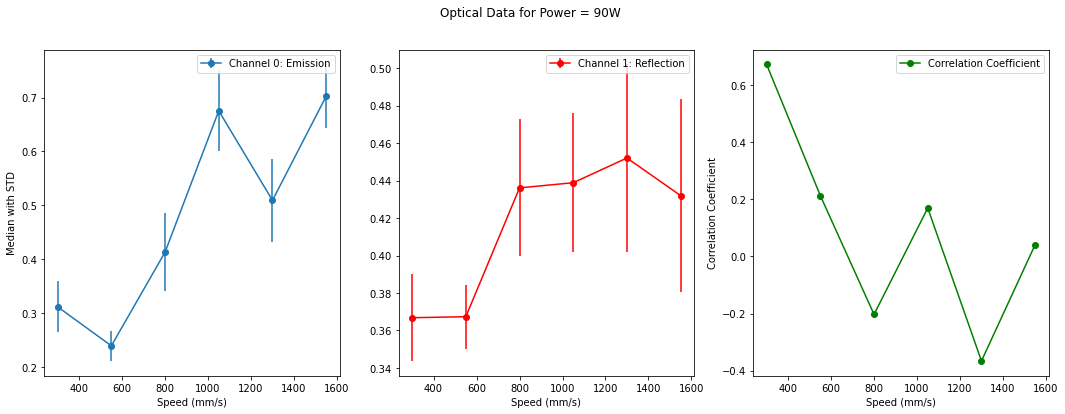

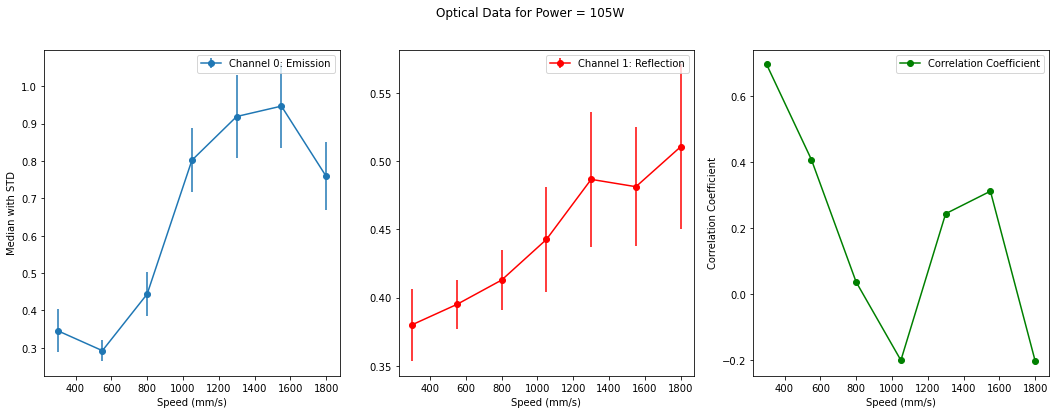

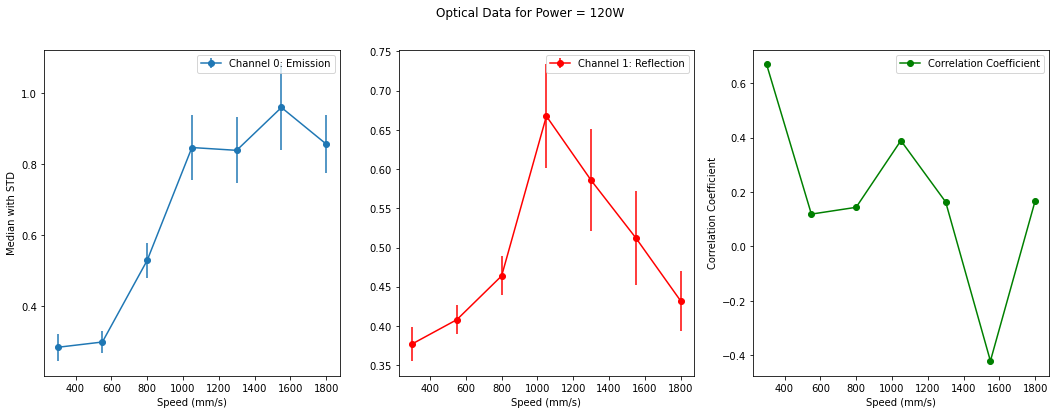

In [31]:
plot_power_speed_data_with_corr(reduced_data_dict)

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def plot_power_speed_data_with_lowest_corr(combined_data_dict):
    # Extract unique power values
    unique_powers = sorted(set(power for (power, _) in combined_data_dict.keys()))
    
    # For each unique power, find all speeds and process data
    for power in unique_powers:
        # Filter keys by power and sort speeds
        speeds = sorted(speed for (p, speed) in combined_data_dict.keys() if p == power)
        
        # Data for plotting
        medians_channel_0 = []
        medians_channel_1 = []
        stds_channel_0 = []
        stds_channel_1 = []
        corrs = []  # Store correlation coefficients

        for speed in speeds:
            data_struct = combined_data_dict[(power, speed)]
            stats_tensor = data_struct['stats_tensor']
            corr = data_struct['corr']
            
            medians_channel_0.append(stats_tensor[0, 0, 0])
            stds_channel_0.append(stats_tensor[0, 0, 1])
            medians_channel_1.append(stats_tensor[0, 1, 0])
            stds_channel_1.append(stats_tensor[0, 1, 1])
            corrs.append(corr)  # Append the correlation coefficient

        # Plotting with two y-axes
        fig, ax1 = plt.subplots(figsize=(12, 6))
        fig.suptitle(f'Optical Data for Power = {power}W')

        color1 = 'tab:blue'
        ax1.set_xlabel('Speed (mm/s)')
        ax1.set_ylabel('Channel 0: Emission', color=color1)
        ax1.errorbar(speeds, medians_channel_0, yerr=stds_channel_0, fmt='-o', color=color1, label='Channel 0: Emission')
        ax1.tick_params(axis='y', labelcolor=color1)

        # Instantiate a second y-axis
        ax2 = ax1.twinx()
        color2 = 'tab:red'
        ax2.set_ylabel('Channel 1: Reflection', color=color2)
        ax2.errorbar(speeds, medians_channel_1, yerr=stds_channel_1, fmt='-o', color=color2, label='Channel 1: Reflection')
        ax2.tick_params(axis='y', labelcolor=color2)

        # Ensure that the labels are correctly applied
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

        # Find speed with the lowest correlation coefficient and add a vertical line
        min_corr_index = np.argmin(corrs)  # Index of the lowest correlation
        min_corr_speed = speeds[min_corr_index]  # Speed corresponding to the lowest correlation
        # Adding a label for the vertical line to be included in the legend
        ax1.axvline(x=min_corr_speed, color='k', linestyle='--', label='Lowest Corr Speed')

        # Calling legend after all labeled plot elements have been added
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        fig.tight_layout()  # For layout adjustment

        plt.show()

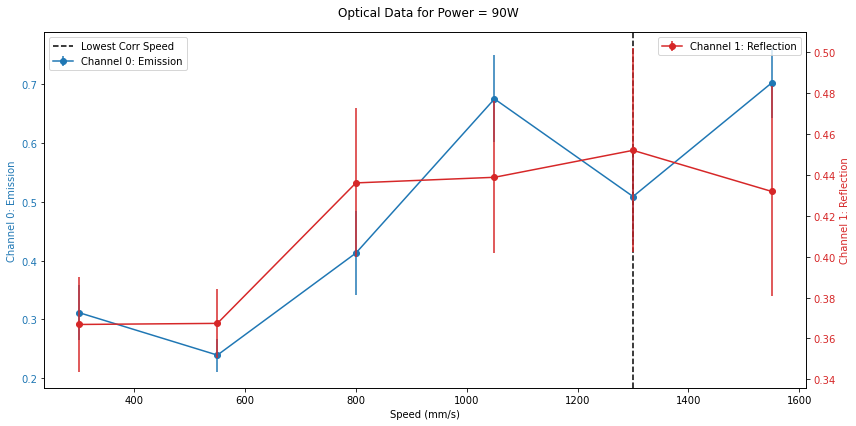

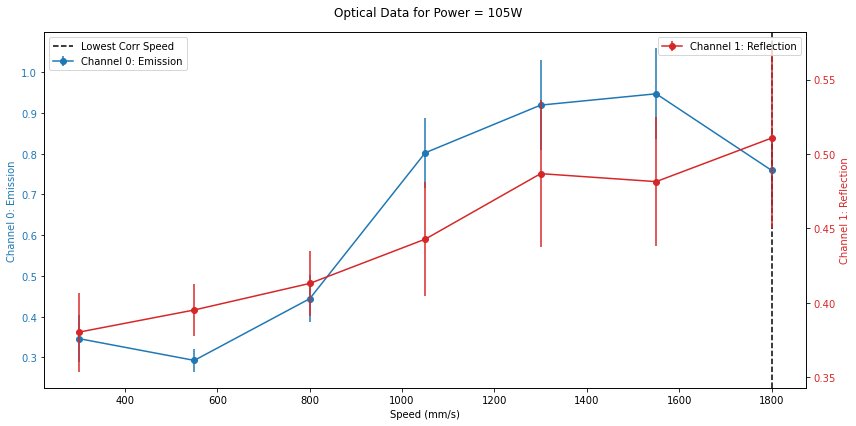

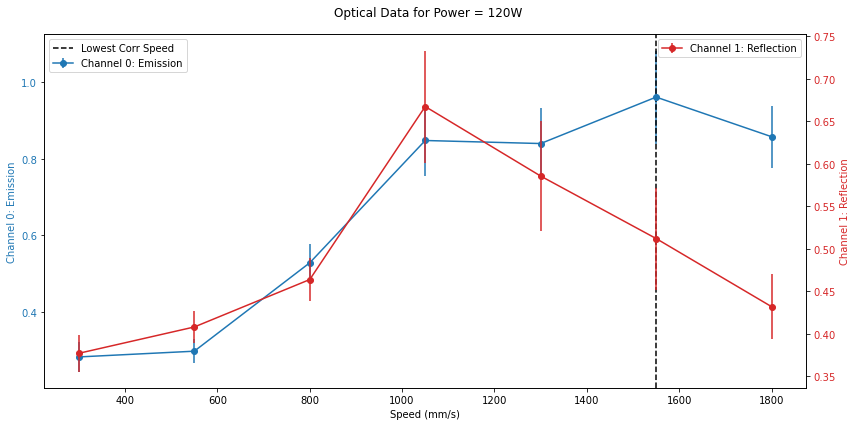

In [33]:
plot_power_speed_data_with_lowest_corr(reduced_data_dict)